In [12]:
import pandas as pd
from matplotlib import pyplot as pp
import numpy as np
import datetime
from scipy import signal

In [24]:
df = pd.read_pickle("recording.pkl")
df.reset_index(inplace=True)

# shortcuts
channel = ["channel{}".format(i) for i in range(5,8)]
highlighted = "highlighted"
interval = "interval"
df.head()

,timestamp,channel0,channel1,channel2,channel3,channel4,channel5,channel6,channel7,channel8,highlighted,interval
0,2017-12-19 12:01:11.967245,-1816,-227,251,330,155,-161,0,-22,-254,False,0
1,2017-12-19 12:01:11.967768,-3191,-1667,-1331,-901,-590,-661,0,545,349,False,0
2,2017-12-19 12:01:11.998511,-2101,-347,143,330,206,41,0,-223,-260,False,0
3,2017-12-19 12:01:11.999480,-1059,622,1387,1020,390,111,0,-296,-301,False,0
4,2017-12-19 12:01:12.000532,-1505,106,696,379,149,-54,0,-229,-369,False,0


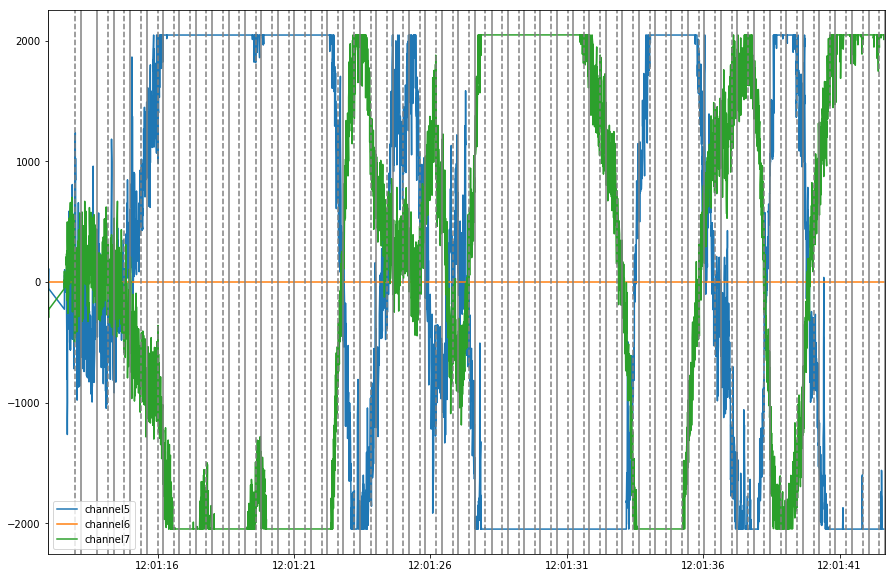

In [30]:
trial_info = df.groupby(["interval"], axis=0).first()[[highlighted, "timestamp"]]
trial_starts = trial_info["timestamp"]
trial_one_sec = trial_starts + datetime.timedelta(seconds=1)

pp.figure(figsize=(15,10))
pp.plot(df["timestamp"], df[channel].values)
trial_starts.map(lambda x: pp.axvline(x, color="gray", linestyle="solid"))
trial_one_sec.map(lambda x: pp.axvline(x, color="gray", linestyle="dashed"))
pp.xlim(trial_starts[0], trial_starts[50])
pp.legend(channel)
pp.show()

In [31]:
df.set_index("timestamp", inplace=True)

In [32]:
intervals = []
for start,end in zip(trial_starts, trial_one_sec):
    # redistribute sample points
    chunk = df[start:end][channel]
    chunk.set_index(pd.to_datetime(np.linspace(start.value, end.value, len(chunk), endpoint=True))-start, inplace=True)
    chunk = chunk.resample("4L").pad()#.interpolate(method="linear")
    intervals.append(chunk)

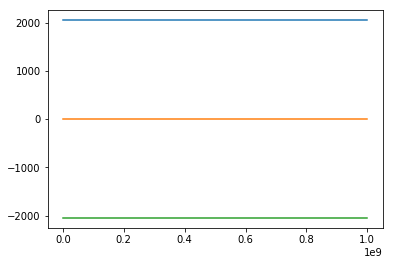

In [39]:
pp.plot(intervals[36])
pp.show()

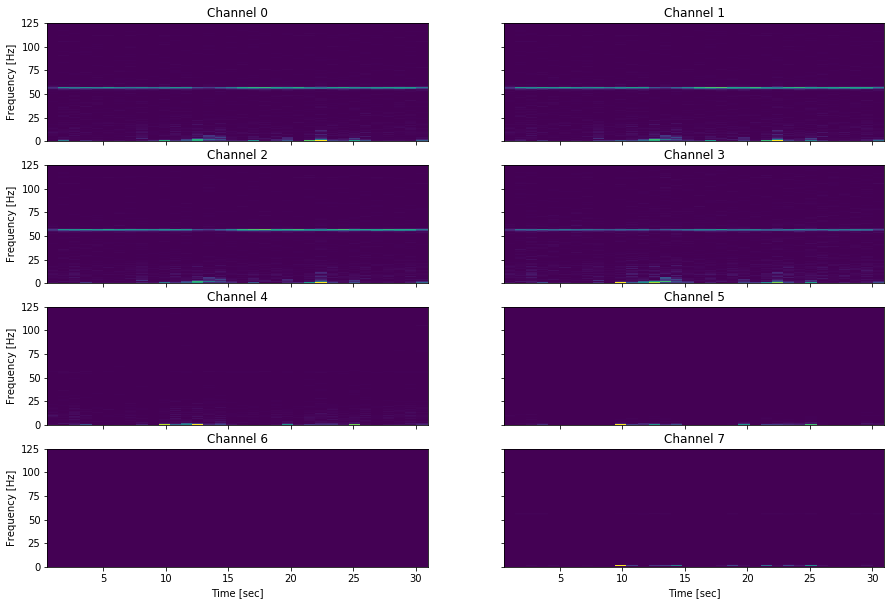

In [4]:
fig,axes = pp.subplots(ncols=2, nrows=4, figsize=(15,10), sharex=True, sharey=True)
for ch,ax in enumerate(axes.ravel()):
    f,t,Sxx = signal.spectrogram(df[channel[ch]], 250)
    ax.pcolormesh(t,f,Sxx)
    
    ax.set_title("Channel {}".format(ch))
    if ch%2 == 0:
        ax.set_ylabel('Frequency [Hz]')
    if ch//2 == 3:
        ax.set_xlabel('Time [sec]')
    
axes[0,0].set_xlim([t[0], t[-1]])
axes[0,0].set_ylim([f[0], f[-1]])
pp.show()